In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import 
from sklearn.preprocessing import StandardScaler

# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.svm import SVC



In [2]:
df = pd.read_csv('student_productivity_distraction_dataset_20000.csv')
df

,student_id,age,gender,study_hours_per_day,sleep_hours,phone_usage_hours,social_media_hours,youtube_hours,gaming_hours,breaks_per_day,coffee_intake_mg,exercise_minutes,assignments_completed,attendance_percentage,stress_level,focus_score,final_grade,productivity_score
0,1,23,Female,4.35,3.63,3.38,2.73,1.83,5.26,6,347,111,2,57.21,10,57,81.87,33.78
1,2,20,Male,6.14,6.58,5.48,1.51,3.13,1.73,13,403,28,10,91.27,10,49,60.90,48.99
2,3,29,Female,4.98,3.26,4.83,3.63,0.18,4.71,1,419,102,8,63.14,2,38,86.22,36.60
3,4,27,Female,3.19,4.58,10.06,3.95,5.75,2.52,9,178,28,18,40.51,6,50,71.77,19.87
4,5,24,Male,7.67,6.21,3.02,1.59,5.46,5.65,8,436,105,7,45.53,6,41,90.13,52.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,26,Female,4.81,7.83,6.86,6.93,2.77,5.68,6,451,0,11,63.69,3,89,82.13,60.43
19996,19997,22,Other,0.83,4.49,6.76,3.79,2.95,1.38,1,375,13,4,74.06,10,56,87.12,17.84
19997,19998,25,Male,9.36,4.33,2.94,6.98,0.35,1.42,4,413,1,11,73.18,9,69,81.58,65.56
19998,19999,22,Female,0.74,4.44,3.15,5.99,3.11,5.01,7,319,1,6,77.02,5,53,53.04,28.06


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             20000 non-null  int64  
 1   age                    20000 non-null  int64  
 2   gender                 20000 non-null  str    
 3   study_hours_per_day    20000 non-null  float64
 4   sleep_hours            20000 non-null  float64
 5   phone_usage_hours      20000 non-null  float64
 6   social_media_hours     20000 non-null  float64
 7   youtube_hours          20000 non-null  float64
 8   gaming_hours           20000 non-null  float64
 9   breaks_per_day         20000 non-null  int64  
 10  coffee_intake_mg       20000 non-null  int64  
 11  exercise_minutes       20000 non-null  int64  
 12  assignments_completed  20000 non-null  int64  
 13  attendance_percentage  20000 non-null  float64
 14  stress_level           20000 non-null  int64  
 15  focus_score  

In [4]:
# Datos estadísticos del dataset
df.describe()

,student_id,age,study_hours_per_day,sleep_hours,phone_usage_hours,social_media_hours,youtube_hours,gaming_hours,breaks_per_day,coffee_intake_mg,exercise_minutes,assignments_completed,attendance_percentage,stress_level,focus_score,final_grade,productivity_score
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,23.00745,5.254562,6.517799,6.250479,4.003655,2.990177,2.988339,7.542400,249.654550,59.648050,9.494100,69.947435,5.478750,64.444350,70.266409,50.180419
std,5773.647028,3.75489,2.742876,2.029784,3.313082,2.305154,1.729815,1.732803,4.016231,143.711231,34.611751,5.801469,17.397431,2.866943,20.176114,17.282277,16.086666
min,1.000000,17.00000,0.500000,3.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,30.000000,40.000000,0.000000
25%,5000.750000,20.00000,2.900000,4.770000,3.380000,2.000000,1.487500,1.490000,4.000000,125.000000,30.000000,4.000000,54.810000,3.000000,47.000000,55.460000,38.700000
50%,10000.500000,23.00000,5.250000,6.510000,6.240000,4.010000,2.980000,2.970000,8.000000,249.000000,60.000000,9.000000,69.985000,5.000000,65.000000,70.315000,50.235000
75%,15000.250000,26.00000,7.640000,8.310000,9.102500,5.970000,4.480000,4.490000,11.000000,373.000000,90.000000,15.000000,85.050000,8.000000,82.000000,85.340000,61.782500
max,20000.000000,29.00000,10.000000,10.000000,12.000000,8.000000,6.000000,6.000000,14.000000,499.000000,119.000000,19.000000,100.000000,10.000000,99.000000,99.990000,100.000000


In [5]:
df.isnull().sum()

student_id               0
age                      0
gender                   0
study_hours_per_day      0
sleep_hours              0
phone_usage_hours        0
social_media_hours       0
youtube_hours            0
gaming_hours             0
breaks_per_day           0
coffee_intake_mg         0
exercise_minutes         0
assignments_completed    0
attendance_percentage    0
stress_level             0
focus_score              0
final_grade              0
productivity_score       0
dtype: int64

In [6]:
# Eliminar la columna genero para obtener la matriz de correlación
df = df.drop(columns=['student_id', 'gender'])

Text(0.5, 1.0, 'Matriz de correlación')

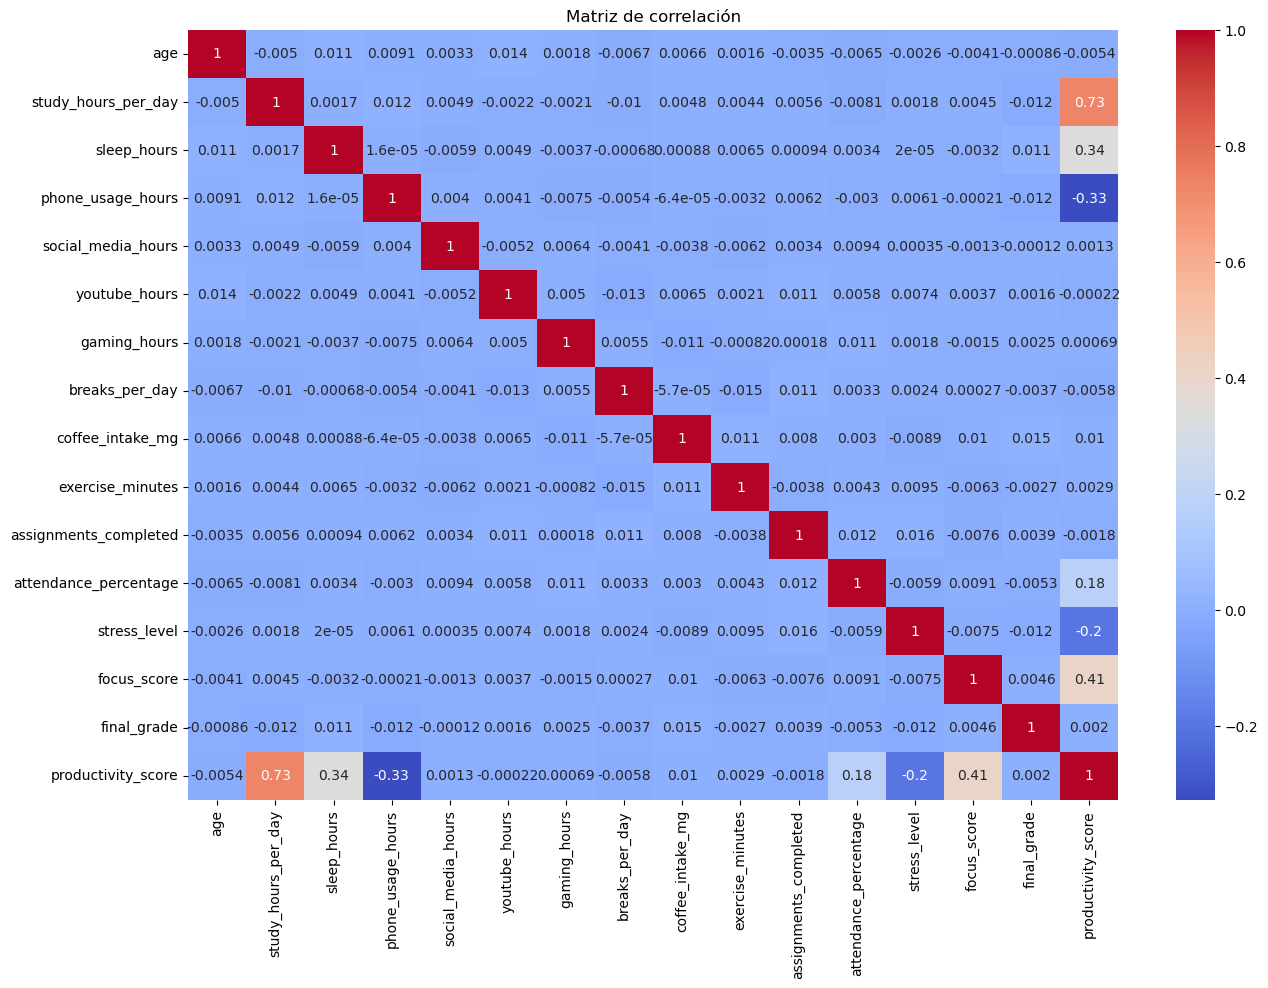

In [7]:
# Obtención de la matriz de correlación 
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")


#### De la matriz de correlación la productividad tiene:
1. Fuerte correlación positiva
    1. Horas de estudio
1. Mediante correlación positiva
    1. Horas de sueño
    1. Porcentaje de atención
    1. Puntaje de concentración
1. Mediante correlación negativa
    1. Horas de uso del telefono
    1. nivel de stress

Por lo tanto de los datos se puede decir que tales parámetros son de vital importancia/relevantes para establecer el nivel de productividad de un estudiante


In [8]:
# Asignar las variables de entrada y salida

X = df.drop(columns=['productivity_score'])
y = df['productivity_score']

In [9]:
# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Valor min después de la estandarización: {X_scaled.min()}")
print(f"Valor min después de la estandarización: {X_scaled.max()}")

Valor min después de la estandarización: -1.7513413518546652
Valor min después de la estandarización: 1.7400119159666518


In [10]:
# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [ ]:
y_pred = model.predict(X_test)


array([55.81, 90.76, 59.64, ..., 37.39, 50.14, 48.76], shape=(4000,))

In [ ]:
# Metricas de rendimiento
accuracy = (y_test, y_pred)
print(f"El accuracy es: {accuracy}")

ValueError: continuous is not supported